# Kanerva's Table 7.3 (page 70)

In [1]:
import sdm as sdmlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
%matplotlib inline

In [2]:
bits = 1000
sample = 1000000
radius = 451
scanner_type = sdmlib.SDM_SCANNER_OPENCL

In [3]:
#address_space = sdmlib.AddressSpace.init_from_b64_file('sdm-10000w.as')
#counter = sdmlib.Counter.load_file('sdm-10000w')
address_space = sdmlib.AddressSpace.init_random(bits, sample)
counter = sdmlib.Counter.init_zero(bits, sample)
sdm = sdmlib.SDM(address_space, counter, radius, scanner_type)

In [4]:
import time
t0 = time.time()
bitstrings = []
for i in range(10000):
    if i % 100 == 0:
        clear_output(wait=True)
        print i
    bs1 = sdmlib.Bitstring.init_random(1000)
    #bs2 = sdmlib.Bitstring.init_random(1000)
    #bitstrings.append(bs1)
    sdm.write(bs1, bs1)
t1 = time.time()
print t1-t0

9900
41.6387619972


In [5]:
b = sdmlib.Bitstring.init_random(1000)
sdm.write(b, b)

In [6]:
from IPython.display import clear_output

max_iter = 1
samples = 5

distances = []
#x = range(200, 250)
x = range(0, 1001)
for i, dist in enumerate(x):
    clear_output(wait=True)
    print 'Distance: {:4d} ({:.2f}%)'.format(dist, 100.*(i+1)/len(x))
    v = []
    for j in range(samples):
        #b = random.choice(bitstrings)
        c = sdmlib.Bitstring.init_from_bitstring(b)
        c.flip_random_bits(dist)
        assert c.distance_to(b) == dist
        d = sdm.iter_read(c, max_iter=max_iter)
        v.append(d.distance_to(c))
    distances.append(1.0*sum(v)/len(v))
print 'Done!'

Distance: 1000 (100.00%)
Done!


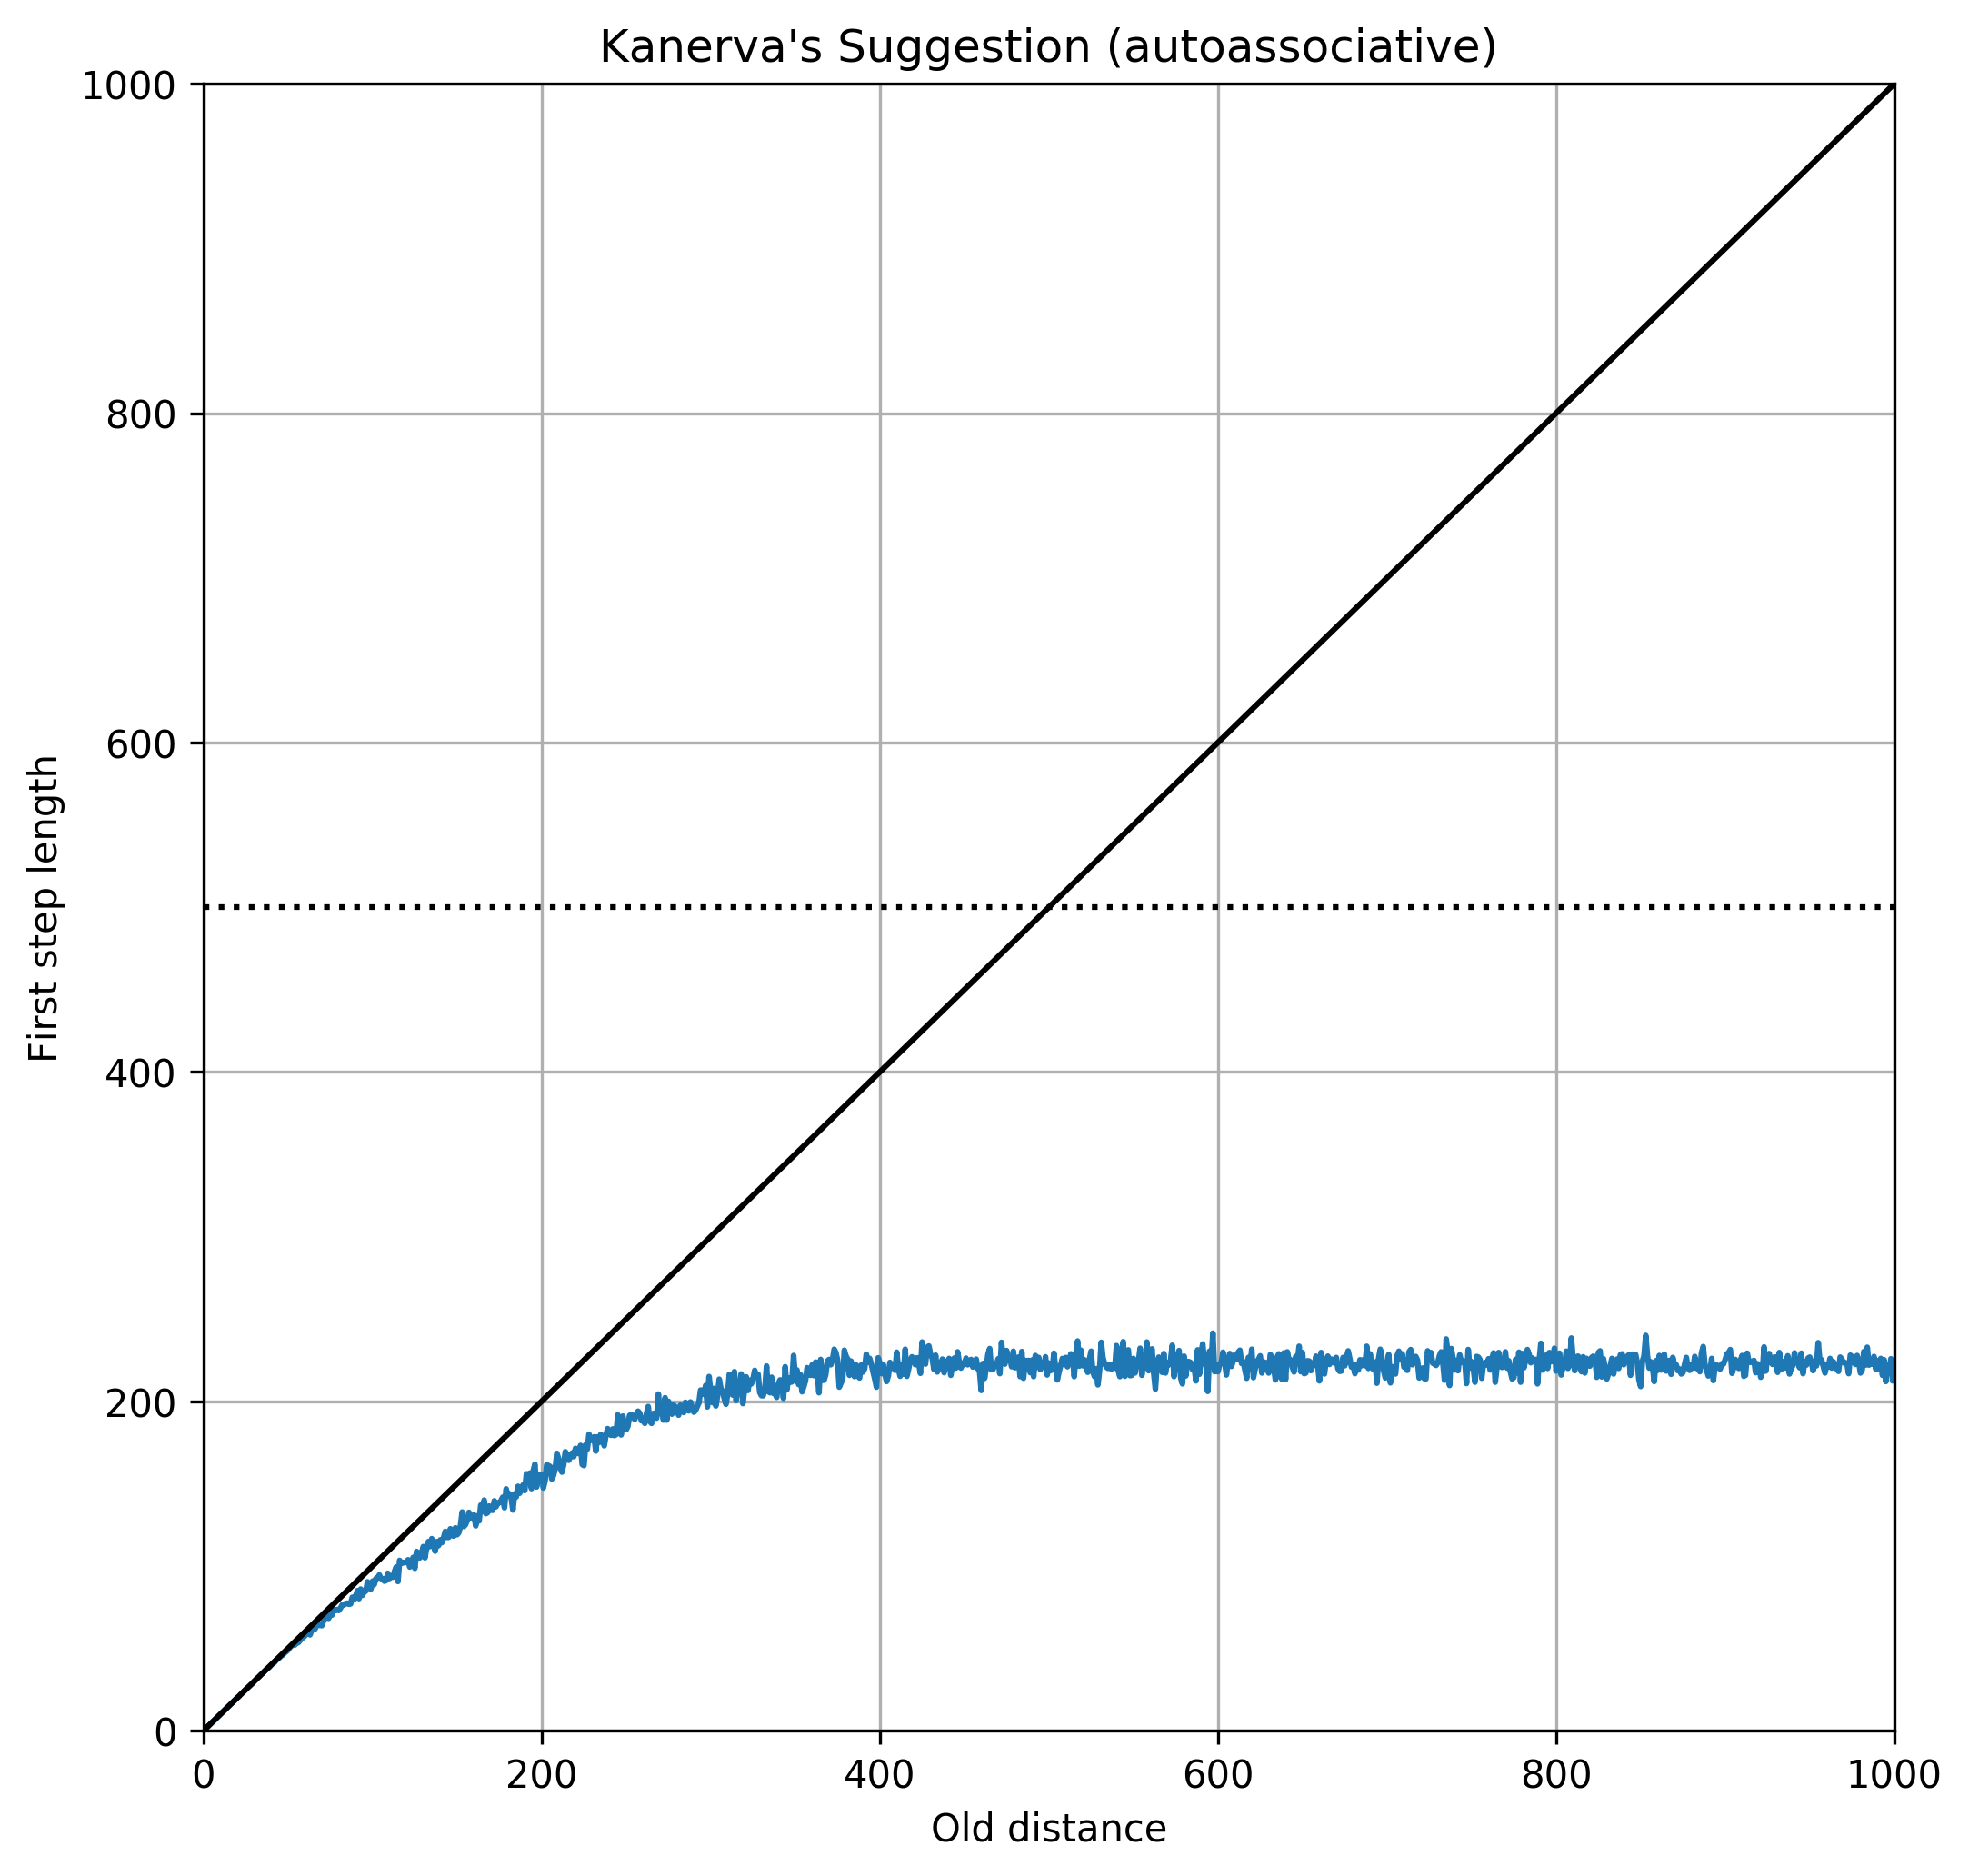

In [9]:
plt.figure(figsize=(8, 8), dpi=300)
plt.plot(x, distances)
plt.plot(x, x, 'k')
plt.plot(x, [500]*len(x), 'k:')
plt.title('Kanerva\'s Suggestion (autoassociative)')
if max_iter == 1:
    plt.ylabel('First step length')
#else:
#    plt.ylabel('New distance (after {} iterative reads)'.format(max_iter))
plt.xlabel('Old distance')
plt.grid()
plt.axis([0, 1000, 0, 1000]);
#plt.axis([x[0], x[-1], x[0], x[-1]]);

In [ ]:
c = sdmlib.Bitstring.init_from_bitstring(b)
c.flip_random_bits(1000)
d = c
print 0, b.distance_to(d)
for i in xrange(10):
    d = sdm.read(d)
    print i+1, b.distance_to(d)

In [ ]:
distances